In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely import Point, LineString, Polygon
import shapely
import random
from enum import Enum
from rasterio.mask import mask
from CPP_Planner import CPP_Planner_Kit
import csv

In [8]:
# opt_path = '../PSO_APF_analysis/opt'
opt_path = '../PSO_APF_SMALL_LAND/opt'
straight_path_dis = opt_path + '1' + '/straight_group.csv'
straight_group = []
with open(straight_path_dis, 'r') as file:
    for row in file:
        # straight_group.append(row[: -1])
        row = row.split(',')
        straight_group.append([float(value) for value in row[: -1]])
# ------------------------------------------------------------
sep_straight_group = []
sep_gap = []
for temp_group in straight_group:
    sep_straight_group += temp_group
    sep_gap.append(len(temp_group))
# ------------------------------------------------------------
opt_groups = []
sep_opt_groups = []
for i in range(1, 5):
# for i in range(1, 13):
    temp_opt_path = opt_path + str(i) + '/opti_group.csv'
    with open(temp_opt_path, 'r') as file:
        temp_group = []
        temp_sep_group = []
        for row in file:
            row = row.split(',')
            # temp_group.append(row)
            temp_group.append([float(value) for value in row[: -1]])
            temp_sep_group += temp_group[-1]
        opt_groups.append(temp_group)
        sep_opt_groups.append(temp_sep_group)

## 显示所有的情况

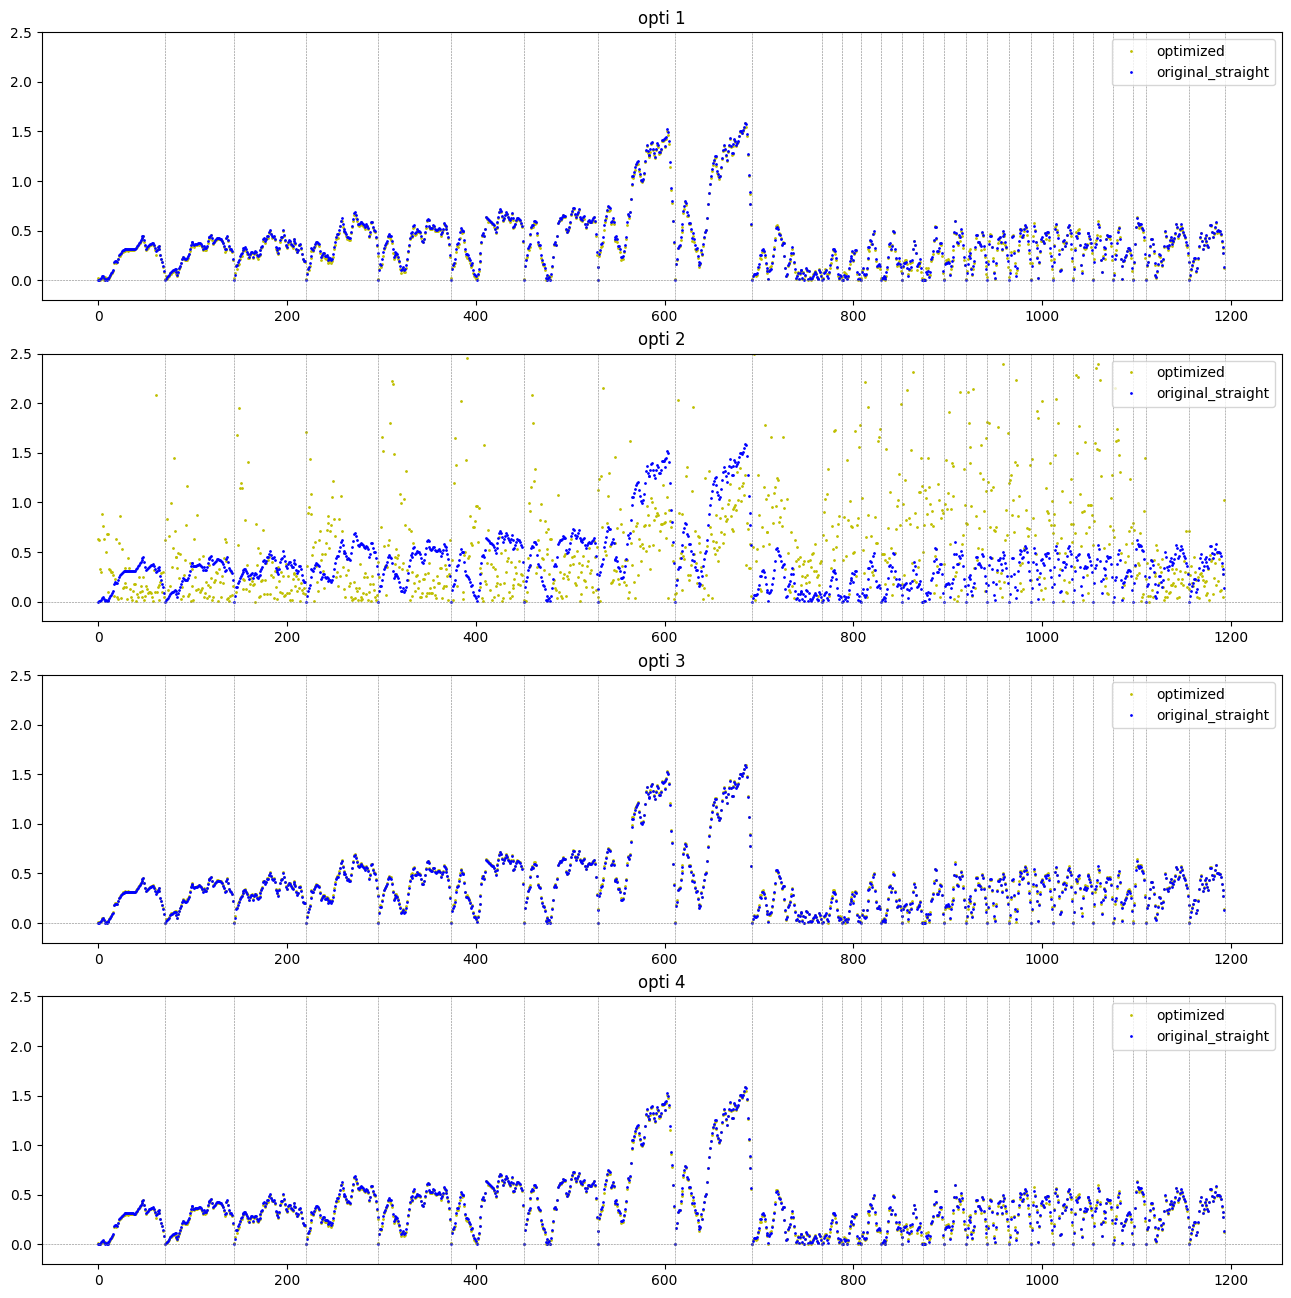

In [9]:
nrow = 4  # 显示几组数据
fig, axes = plt.subplots(nrows=nrow, ncols=1, figsize=(16, 4 * nrow))
for i, ax in enumerate(axes):
    ax.set_ylim([-0.2, 2.5])
    temp_opti_group = sep_opt_groups[i]
    # ------------------------------
    # ax.plot(temp_opti_group, c='y')
    # ax.plot(sep_straight_group, c='b')
    # ------------------------------
    ax.plot(temp_opti_group, c='y', marker='o', markersize=1, linestyle=' ')
    ax.plot(sep_straight_group, c='b', marker='o', markersize=1, linestyle=' ')
    # ------------------------------
    ax.legend(['optimized', 'original_straight'])
    ax.vlines(np.cumsum(sep_gap), ymin=-0.2, ymax=2.5, colors="gray", linestyles="dashed", linewidth=0.4)
    ax.axhline(y=0, color='gray', linewidth=0.4, linestyle='dashed')
    ax.set_title('opti {}'.format(i + 1))

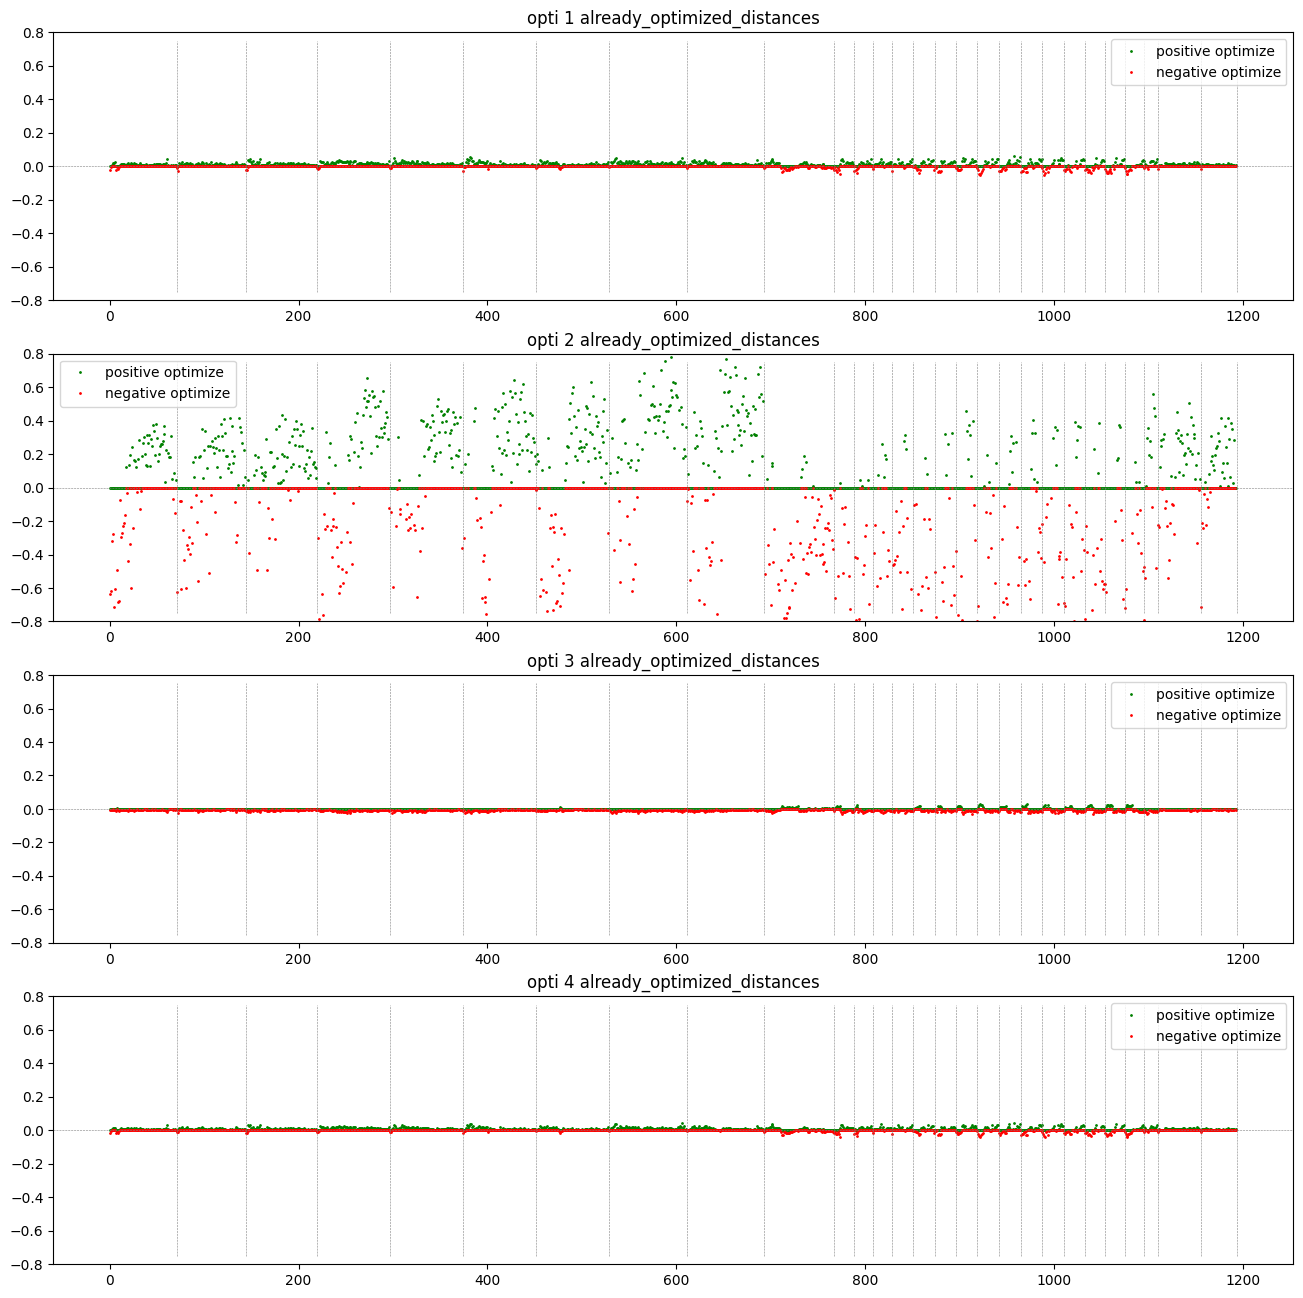

In [10]:
nrow = 4  # 显示几组数据
fig, axes = plt.subplots(nrows=nrow, ncols=1, figsize=(16, 4 * nrow))
for i, ax in enumerate(axes):
    ax.set_ylim([-0.8, 0.8])
    temp_opti_group = sep_opt_groups[i]
    optimized_diff = np.array(sep_straight_group) - np.array(temp_opti_group)
    # 显示大于小于的值分别为不同组不同色
    positive = optimized_diff.copy()
    negative = optimized_diff.copy()
    positive[positive < 0] = 0
    negative[negative > 0] = 0
    # ------------------------------
    # ax.plot(positive, color='g')
    # ax.plot(negative, color='r')
    # ------------------------------
    ax.plot(positive, color='g', marker='o', markersize=1, linestyle=' ')
    ax.plot(negative, color='r', marker='o', markersize=1, linestyle=' ')
    ax.legend(['positive optimize', 'negative optimize'])
    # ax.plot(optimized_diff, c='r')
    ax.axhline(y=0, color='gray', linewidth=0.4, linestyle='dashed')
    ax.vlines(np.cumsum(sep_gap), ymin=-0.75, ymax=0.75, colors="gray", linestyles="dashed", linewidth=0.4)
    ax.set_title('opti {}'.format(i + 1) + ' already_optimized_distances')